<a href="https://colab.research.google.com/github/lee-thien-tuyen/Traffic-Sign/blob/main/Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connect to Google Drive. 
Contain folder dataser

In [1]:
from google.colab import drive 
drive.mount('/content/drive/') 

Mounted at /content/drive/


#Import library 

In [2]:
import numpy as np                             #importing the numpy library for numerical computations
import pandas as pd                            #importing the pandas library for data manipulation and analysis 
import os                                      #importing the os module for interacting with the operating system 
import cv2                                     #importing the OpenCv library for image processing
from PIL import Image                          #import the PIL for image processing 
import warnings 
import matplotlib.pyplot as plt               #import the Matplotlib library for data visualization  
import tensorflow as tf                        #import the Tensorflow library for deep learning
from tensorflow import keras                   #import the keras module from tensorflow for building neural networks
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split #importing train_test_split from scikit-learn for splitting data
from matplotlib import style                         #importing style from matplotlib for customizing plot styles
style.use('seaborn-dark')                            #setting the plot style to 'seaborn-dark' 
warnings.filterwarnings("ignore")                    #Ignore warning messages during code execution 
np.random.seed(42)                                   #Setting the random seed for reproducibility

<ipython-input-2-0977967a70c3>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-dark')                            #setting the plot style to 'seaborn-dark'


#Data Preparetion

In [3]:
def read_images(dir_path):
  images = []
  labels = []

  valid_extensions = ('.jpg', 'jpeg', '.png')  #Valid image file extension 

  #Get subdirections within directory 
  subdirections = [subdir for subdir in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path,subdir))]
  for subdir in subdirections:
    subdir_path = os.path.join(dir_path,subdir)
    if not os.listdir(subdir_path):
      continue  #skip empty subdirections 
    
    #Iterate over images in the subdirectory 
    for filename in os.listdir(subdir_path):
      if filename.lower().endswith(valid_extensions): #Check if the file has a valid image extension
        image_path = os.path.join(subdir_path,filename)
        image = cv2.imread(image_path)
        image = cv2.resize(image,(30,30))     #Resize the image to 30x30 pixels
        images.append(image)

        #Assign the label based on the subdirectory name 
        label = int(subdir)
        labels.append(label)

  data = np.array(list(zip(images,labels)))

  return data

In [10]:
# !unzip "/content/drive/MyDrive/Traffic_Sign_Recognition/GTSRB.zip" -d "/content/drive/MyDrive/Traffic_Sign_Recognition/data"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00010.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00011.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00012.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00013.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00014.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00015.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00016.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00017.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/data/train/5/00005_00053_00018.png  
  inflating: /content/drive/MyDrive/Traffic_Sign_Recognition/

In [4]:
dataset_path = "/content/drive/MyDrive/Traffic_Sign_Recognition/data/Train"
train_data = read_images(dataset_path)

In [5]:
print(f"Train Data Shape : {train_data.shape}")

Train Data Shape : (29806, 2)


In [6]:
# Label Overview
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
}

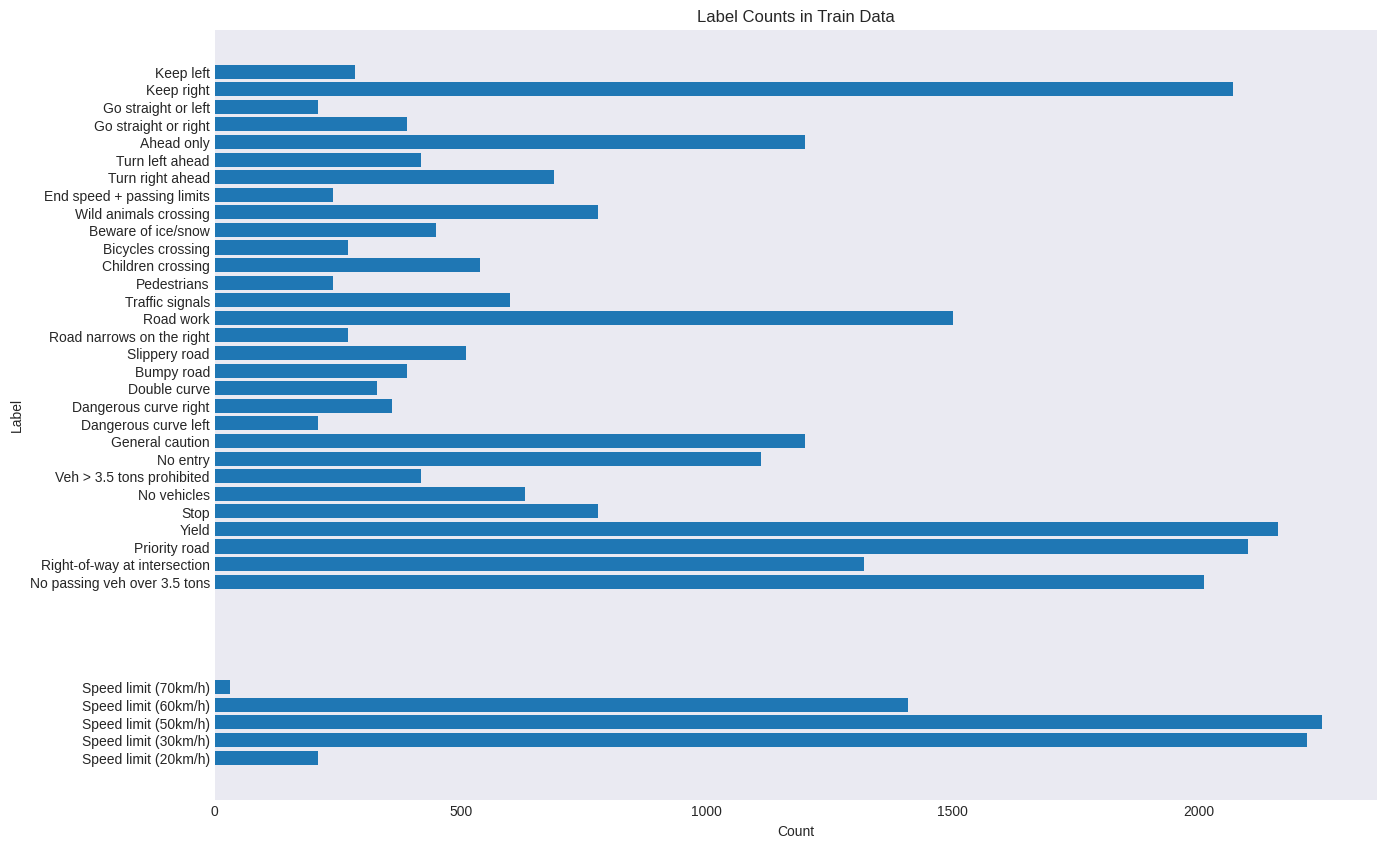

In [8]:
# Convert label values to integers
labels = train_data[:, 1].astype(int)

# Get the unique labels and their counts
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a horizontal bar plot
plt.figure(figsize=(15,10))
plt.barh(unique_labels, label_counts)
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Label Counts in Train Data')
plt.yticks(unique_labels, [classes[label] for label in unique_labels])
plt.show()

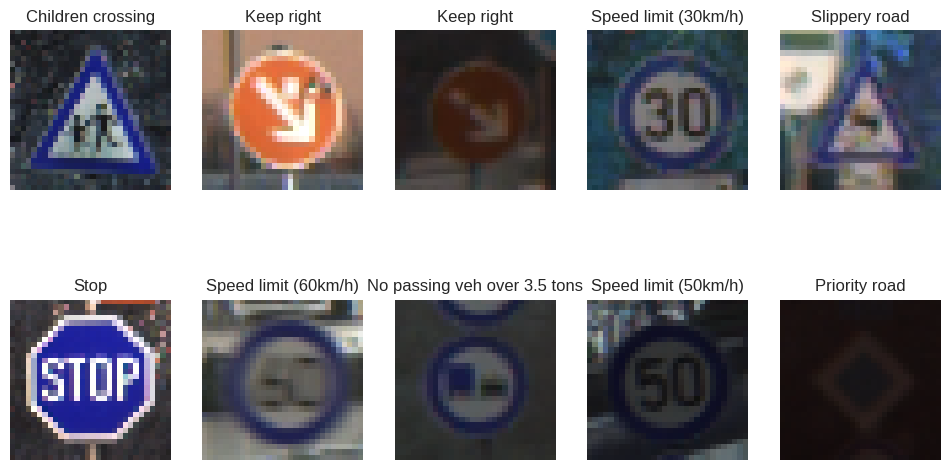

In [9]:
# Select 10 random samples from train_data
indices = np.random.choice(train_data.shape[0], size=10, replace=False)
samples = train_data[indices]

# Create a grid of subplots for the images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4)

for i, (image, label) in enumerate(samples):
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(classes[label])
    ax.axis('off')

plt.show()

In [10]:
shuffled_train = train_data.copy()  # Create a copy of train_data to avoid modifying the original array
shuffled_train = np.array(shuffled_train)  # Shuffle the array randomly

In [11]:
# Split the shuffled_train array into training and testing sets
train_set, test_set = train_test_split(shuffled_train, test_size=0.2, random_state=42)

# Separate the input (X) and output/label (y) arrays from the training set
x_train = train_set[:, 0]
y_train = train_set[:, 1]

# Separate the input (X) and output/label (y) arrays from the testing set
x_test = test_set[:, 0]
y_test = test_set[:, 1]

# Convert the data type of the arrays to int
x_train = np.array([np.array(x) for x in x_train])
y_train = np.array([np.array(y) for y in y_train])
x_test = np.array([np.array(x) for x in x_test])
y_test = np.array([np.array(y) for y in y_test])

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (23844, 30, 30, 3)
x_test.shape: (5962, 30, 30, 3)
y_train.shape: (23844,)
y_test.shape: (5962,)


In [12]:
# Convert target labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

#Create model and evaluation

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(30,30,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(43, activation='softmax')
])

In [14]:
lr = 0.001
epochs = 30

opt = tf.keras.optimizers.Adam(learning_rate=lr)  # Set the learning_rate instead of decay
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=15,            # Increase the rotation range for more varied rotations
    zoom_range=0.2,               # Increase the zoom range for more varied zoom levels
    width_shift_range=0.15,       # Increase the range of horizontal shift
    height_shift_range=0.15,      # Increase the range of vertical shift
    shear_range=0.2,              # Increase the shear range for more shearing effects
    horizontal_flip=True,         # Enable horizontal flipping
    vertical_flip=True,           # Enable vertical flipping
    fill_mode="reflect"           # Use reflect mode for filling empty pixels
)


history = model.fit(aug.flow(x_train,y_train, batch_size=32), epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/30
746/746 [==============================] - 115s 150ms/step - loss: 2.0599 - accuracy: 0.4427 - val_loss: 0.9007 - val_accuracy: 0.7103
Epoch 2/30
746/746 [==============================] - 106s 142ms/step - loss: 0.9040 - accuracy: 0.7113 - val_loss: 0.3903 - val_accuracy: 0.8623
Epoch 3/30
746/746 [==============================] - 107s 144ms/step - loss: 0.5785 - accuracy: 0.8109 - val_loss: 0.3257 - val_accuracy: 0.8868
Epoch 4/30
746/746 [==============================] - 118s 158ms/step - loss: 0.4478 - accuracy: 0.8498 - val_loss: 0.2381 - val_accuracy: 0.9153
Epoch 5/30
746/746 [==============================] - 101s 136ms/step - loss: 0.3634 - accuracy: 0.8784 - val_loss: 0.1958 - val_accuracy: 0.9306
Epoch 6/30
746/746 [==============================] - 95s 127ms/step - loss: 0.3398 - accuracy: 0.8885 - val_loss: 0.1608 - val_accuracy: 0.9406
Epoch 7/30
746/746 [==============================] - 94s 126ms/step - loss: 0.3012 - accuracy: 0.8977 - val_loss: 0.1903 - v

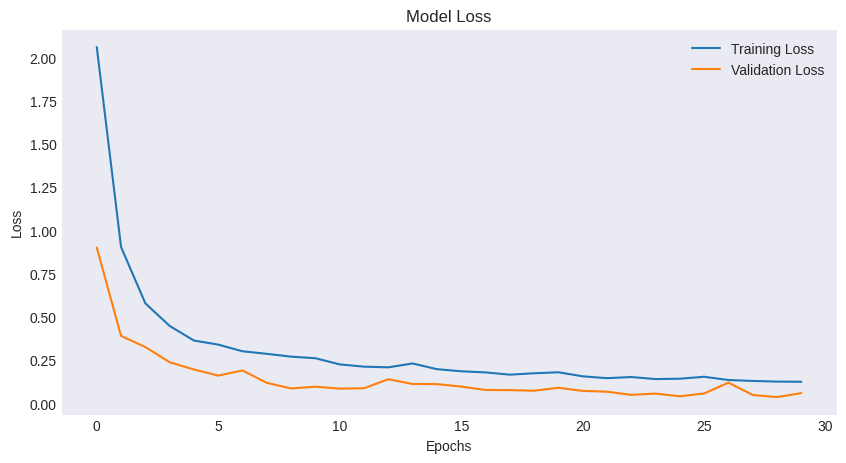

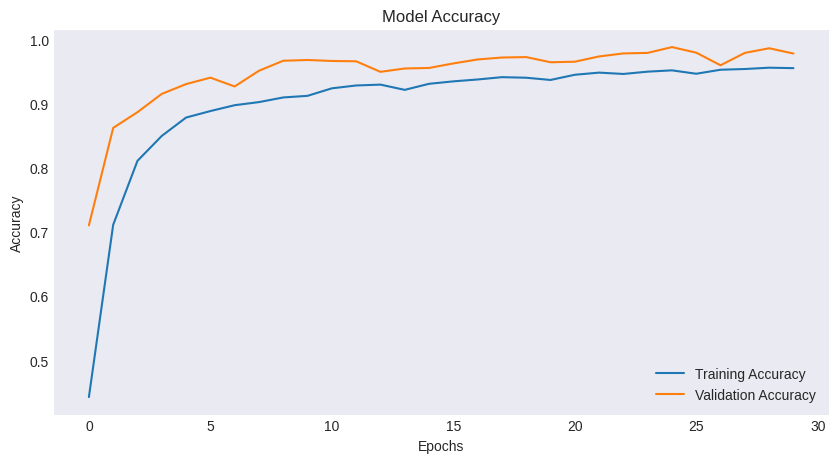

In [16]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Convert NumPy array to DataFrame
shuffled_train_dataframe = pd.DataFrame(shuffled_train)
# Save DataFrame as CSV file
shuffled_train_dataframe.to_csv('data.csv', index=False)

In [18]:
model.save("/content/drive/MyDrive/Traffic_Sign_Recognition/saved_model.h5")

In [19]:
def predict_image(model_path, image_path):
    # Load the model
    model = tf.keras.models.load_model(model_path)
    
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (30, 30))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    
    # Make predictions
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions)
    
    return predicted_label

model_path = "/content/drive/MyDrive/Traffic_Sign_Recognition/saved_model.h5"
image_path = "/content/drive/MyDrive/Traffic_Sign_Recognition/data/Test/00002.png"

predicted_label = predict_image(model_path, image_path)
print("Predicted Label:", classes[predicted_label])

1/1 [==============================] - 0s 192ms/step
Predicted Label: Keep right
